In [1]:
import logging

from sklearn.metrics import accuracy_score

from ekf.ekf import EKFConfig, EKFSkillRating, Matches
from ekf import simulated_data

logging.basicConfig(level=logging.INFO)

In [2]:
matches_df = simulated_data.simulate_matches(n_players=7, n_matches=700, random_state=42)

In [3]:
matches = Matches.from_pandas(matches_df)

In [4]:
config = EKFConfig(
    sigma_match=1.0,
    lambda_decay=0.02,
    sigma_skill=0.05,
    sigma_momentum=0.05,
    default_skill=0.0,
    default_skill_var=3.0,
    default_momentum=0.0,
    default_momentum_var=2.0,
    default_covariance=0.0
)
ekf = EKFSkillRating(config)

In [5]:
history = ekf.fit(matches)

INFO:ekf.ekf:Fitting 700 matches completed in 0.06 seconds


In [6]:
# add predictions to the matches dataframe
pred_df = ekf.predict_dataframe(matches_df)

In [7]:
y_true = (pred_df.winner == pred_df.player1).astype(int)
y_pred = (pred_df.pred_proba >= 0.5).astype(int)
y_pred_true_skill = (pred_df.player1_true_skill >= pred_df.player2_true_skill).astype(int)

In [8]:
# theoretical maximum possible accuracy based on players' true skill
accuracy_score(y_true, y_pred_true_skill)

0.8371428571428572

In [9]:
# EKF's accuracy based on modelled latent skill
accuracy_score(y_true, y_pred)

0.8242857142857143

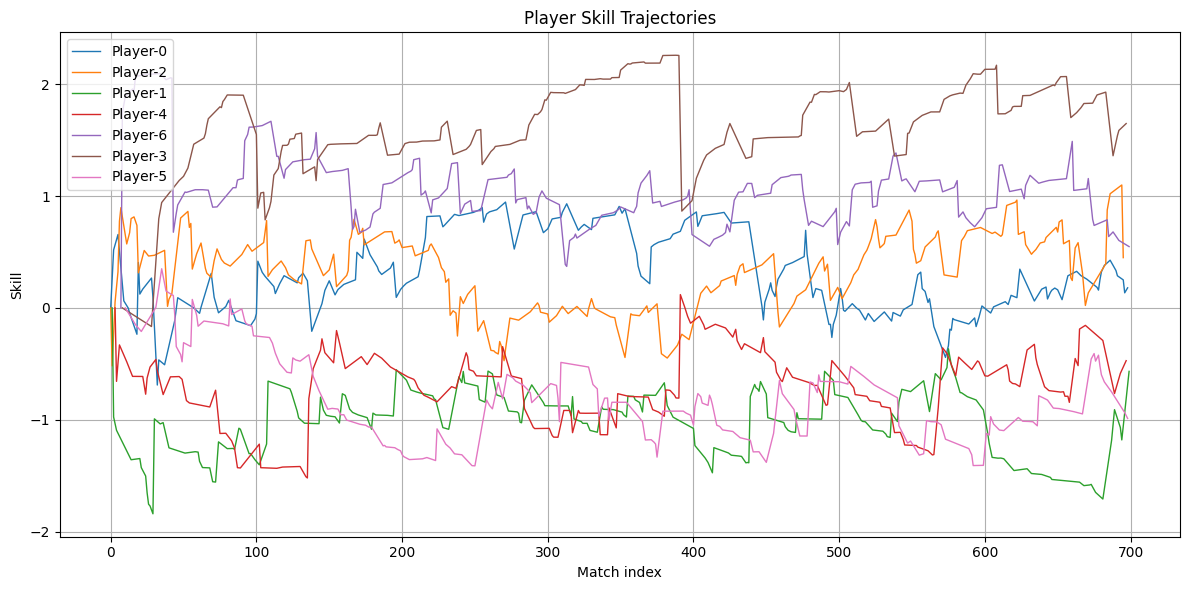

In [10]:
history.plot_history()